# Capstone Project (1) - Arif Aygun
# Data Experimentation (A/B Testing)

### Introduction

##### The objective of this project is to examine the effects of user engagement after seeing Ad A or Ad B

### Problem

##### An advertising company has developed a new ad to have users engage with their questionnaire. The company has shown the new ad to some users and a dummy ad to others and wants their data analyst team to interpret the results. Does the new ad generate more responses to their questionnaire? Is it statistically significant? Is the company justified in using the new ad?

##### A/B testing is common in the business world and is a way to compare two versions of something to figure out which performs better. Figuring out which ad users prefer is a real life business problem that would be expected to know how to solve as a business data analyst. 

### Data

##### Dataset is found on kaggle from an advertising company.

https://www.kaggle.com/osuolaleemmanuel/ad-ab-testing

### Data Science Approach

##### - Data wrangling/ data cleaning

##### - EDA - exploring the data

##### - Modeling - A/B testing

##### - Interpretation

### Deliverables

##### - All Python code

##### - A presentation slide deck

...................................................................................................

### Data wrangling/ data cleaning

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import norm

In [15]:
ad_smart = pd.read_csv("AdSmartABdata.csv")
ad_smart.head(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
9,004c4cc9-f2ca-4df7-adc9-3d0c3c4f0342,control,2020-07-05,14,Generic Smartphone,6,Chrome Mobile,0,0


In [16]:
ad_smart.tail(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
8067,ffc594ef-756c-4d24-a310-0d8eb4e11eb7,exposed,2020-07-05,1,Samsung SM-G950F,6,Chrome Mobile WebView,0,0
8068,ffc860d9-dece-4e24-92b2-3379fe7dc73d,control,2020-07-10,8,Samsung SM-A520F,6,Samsung Internet,0,0
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1
8070,ffcea781-a6e7-4f98-9d90-f95377270476,control,2020-07-03,15,Samsung SM-N976B,6,Facebook,0,0
8071,ffdfdc09-48c7-4bfb-80f8-ec1eb633602b,exposed,2020-07-03,4,Generic Smartphone,6,Chrome Mobile,0,1
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0
8076,fffbb9ff-568a-41a5-a0c3-6866592f80d8,control,2020-07-10,14,Samsung SM-G960F,6,Facebook,0,0


In [17]:
ad_smart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [18]:
ad_smart.shape

(8077, 9)

### Data Preprocessing

#### Check for null values

In [19]:
ad_smart.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

- There is not any null value.

#### Check non-answer observations

In [20]:
no_answer = ad_smart[(ad_smart['yes'] == 0) & (ad_smart['no'] == 0)]
no_answer

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [21]:
ad_smart.duplicated().any()

False

- There is not any dublicated value.

In [22]:
no_answer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6834 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   6834 non-null   object
 1   experiment   6834 non-null   object
 2   date         6834 non-null   object
 3   hour         6834 non-null   int64 
 4   device_make  6834 non-null   object
 5   platform_os  6834 non-null   int64 
 6   browser      6834 non-null   object
 7   yes          6834 non-null   int64 
 8   no           6834 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 533.9+ KB


- 6834 observations will be dropped.

#### Dropping non-answer observations and assign to another variable

In [23]:
no_answer_dropped= ad_smart.drop(no_answer.index)

In [24]:
no_answer_dropped.shape

(1243, 9)

- 1243 observations are left.

### EDA - Exploratory Data Analysis

In [25]:
no_answer_dropped['experiment'].value_counts()

exposed    657
control    586
Name: experiment, dtype: int64

In [26]:
num_control= no_answer_dropped.experiment.value_counts().control
num_control

586

In [27]:
num_exposed= no_answer_dropped.experiment.value_counts().control
num_exposed

586

In [28]:
experiment_yn= no_answer_dropped.groupby('experiment')['yes','no'].sum()
experiment_yn

/var/folders/ky/pck1pvdx5w1dkfmlxqs57pxw0000gn/T/ipykernel_8109/4075499273.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  experiment_yn= no_answer_dropped.groupby('experiment')['yes','no'].sum()


,yes,no
experiment,,
control,264,322
exposed,308,349


In [29]:
experiment_yes= no_answer_dropped.groupby('experiment')['yes'].sum()
experiment_yes

experiment
control    264
exposed    308
Name: yes, dtype: int64

In [30]:
control_yes=experiment_yes.iloc[0]
exposed_yes=experiment_yes.iloc[1]
control_yes, exposed_yes

(264, 308)

In [31]:
rate_control = control_yes/num_control
rate_expose = exposed_yes/num_exposed
print(rate_control)
print(rate_expose)

0.45051194539249145
0.5255972696245734


- Ad Success Control group 45.05%

- Ad Success Exposed group 52.55%

- Ad success is higher on the exposed group by 7%

### Modeling - A/B testing

In [33]:
alpha = 0.05 #Significance Level

In [34]:
p_pooled= (control_yes+exposed_yes)/(num_control+num_exposed)
p_pooled

0.4880546075085324

In [35]:
pooled_variance= p_pooled*(1-p_pooled) * (1/num_control+1/num_exposed)
pooled_variance

0.000852755316034897

In [36]:
SE = np.sqrt(pooled_variance)
SE

0.02920197452287939

In [37]:
test_stat = (rate_control - rate_expose)/SE
test_stat

-2.571241344425307

In [38]:
# critical value usig the standard normal distribution
Z_crit = norm.ppf(1-alpha/2)
Z_crit

1.959963984540054

In [39]:
# Margin of error
m = SE * Z_crit
m

0.057234818342299834

In [40]:
# two sided test and using symmetry property of Normal distibution so we multiple with 2
p_value = norm.sf(test_stat)*2
p_value

1.9898665319509818

In [41]:
# Confidence Interval
CI = [(rate_control-rate_expose) - SE * Z_crit, (rate_control-rate_expose) + SE * Z_crit]
CI


[-0.1323201425743818, -0.01785050588978214]

In [42]:
if np.abs(test_stat) >= Z_crit:
    print("reject the null")
else:
    print("can not reject the null")
    print(p_value)

reject the null


In [43]:
print("Test Statistics stat: ", test_stat)
print("Z-critical: ", Z_crit)
print("P_value: ", p_value)
print("Confidence Interval of 2 sample Z-test for proportions: ", np.round(CI,6))

Test Statistics stat:  -2.571241344425307
Z-critical:  1.959963984540054
P_value:  1.9898665319509818
Confidence Interval of 2 sample Z-test for proportions:  [-0.13232  -0.017851]


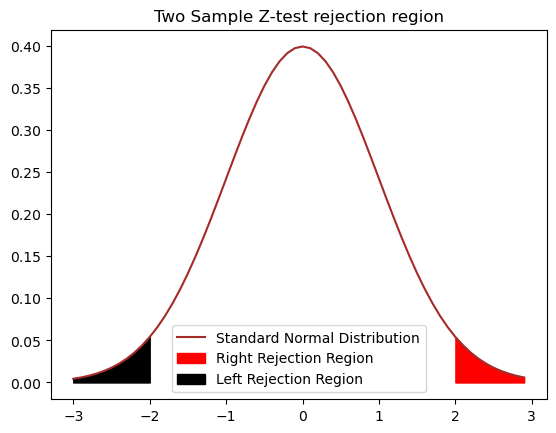

In [57]:
import matplotlib.pyplot as plt
z = np.arange(-3,3, 0.1)
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',color = 'brown',linewidth = 1.5)
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), label = 'Right Rejection Region',color ='red' )
plt.fill_between(z[z<(-1)*Z_crit], norm.pdf(z[z<(-1)*Z_crit]), label = 'Left Rejection Region',color ='black' )
plt.title("Two Sample Z-test rejection region")
plt.legend()
plt.show()

### Conclusion

- Test_stat (|-2.571241344425307|) > Z_crit (1.959963984540054)


- We reject the null hypothesis and conclude that there is statistically significant difference between the AdA and AdB


- These findings indicate that the new ad will yield extra benefit.